<a href="https://colab.research.google.com/github/kristevalex/jupyterlab-tutorial/blob/master/stddistrib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv("drive/MyDrive/jupyter/stddiv.csv")
df.head()

,x,y
0,1004.449750,-9.222250
1,-99.909181,4.291199
2,-94.171273,-1.039581
3,-108.038349,1.950343
4,1003.420483,-10.123777


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       60000 non-null  float64
 1   y       60000 non-null  float64
dtypes: float64(2)
memory usage: 937.6 KB


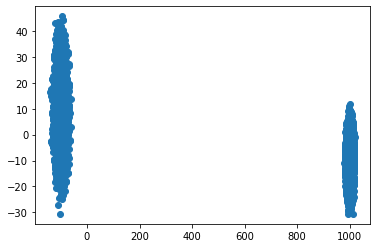

In [5]:
plt.scatter(df.x, df.y)

In [6]:
df1 = copy.deepcopy(df)
df2 = copy.deepcopy(df)

In [11]:
diviser = df.x > 400
diviser

0         True
1        False
2        False
3        False
4         True
         ...  
59995     True
59996    False
59997     True
59998    False
59999     True
Name: x, Length: 60000, dtype: bool

In [15]:
ids = [id for id in range(len(diviser)) if diviser[id]]
ids[:10]

[0, 4, 5, 6, 8, 9, 10, 11, 12, 13]

In [32]:
def display(df, color=None):
  plt.scatter(df.x, df.y, alpha=0.1, color=color)
  plt.title("diviation 1")
  plt.ylabel("y")
  plt.xlabel("x")
  plt.legend()
  plt.show()

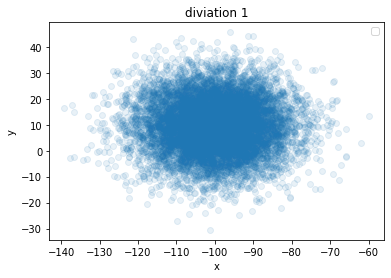

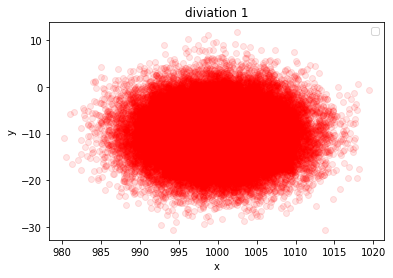

In [35]:
df1 = df.loc[df.index.difference(ids)]
df2 = df.loc[ids]
display(df1)
display(df2, color='red')

In [28]:
def normalize(df):
  X = df.x.mean()
  Y = df.y.mean()
  dfc = copy.deepcopy(df)
  dfc.x -= X
  dfc.y -= Y
  return dfc, X, Y

-100.11533499417263
9.879474794058304


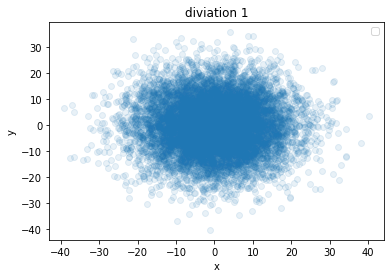

In [62]:
df1n, xmean1, ymean1 = normalize(df1)
df2n, xmean2, ymean2 = normalize(df2)
print(xmean1)
print(ymean1)
display(df1n)

In [42]:
from scipy.stats import norm

In [64]:
fit = norm.fit(df2.x)
print(fit[0])
print(fit[1])

1000.0074372714778
4.992370860137758


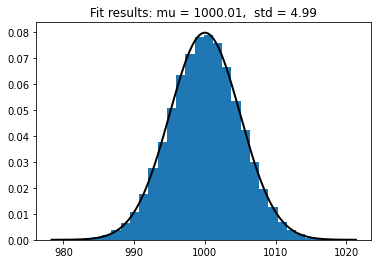

In [70]:
plt.hist(df2.x, bins=30, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, fit[0], fit[1])
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (fit[0], fit[1])
plt.title(title)
plt.show()